# Hypothesis test on Pearson correlation

Analizamos la posible correlación entre dos variables. En este caso hemos elegido un *dataset* en el cual existen dos variables interesantes: **fertilidad** y **analfabetismo**. A continuación vamos a realizar un análisis exploratorio de estas variables.

In [24]:
# Importing libreries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics_functions.Statistical_functions import *

# Set default Seaborn style
sns.set()

In [2]:
# Dataset
dataset = pd.read_csv('data/female_literacy_fertility.csv')

# Preview of the data
print(dataset.head())

    Country  Continent  female literacy  fertility     population
0      Chine       ASI             90.5      1.769  1,324,655,000
1       Inde       ASI             50.8      2.682  1,139,964,932
2        USA       NAM             99.0      2.077    304,060,000
3  Indonésie       ASI             88.8      2.132    227,345,082
4     Brésil       LAT             90.2      1.827    191,971,506


Como podemos observar, los datos no nos dan el índice de analfabetismo sino el índice de alfabetización en cada país. Para obtener el índice de analfabetismo simplemente realizamos una *inversión* o diferencia.

In [3]:
# Illiteracy index
dataset['female illiteracy'] = 100 - dataset['female literacy']

# Data
print(dataset.head())

    Country  Continent  female literacy  fertility     population  \
0      Chine       ASI             90.5      1.769  1,324,655,000   
1       Inde       ASI             50.8      2.682  1,139,964,932   
2        USA       NAM             99.0      2.077    304,060,000   
3  Indonésie       ASI             88.8      2.132    227,345,082   
4     Brésil       LAT             90.2      1.827    191,971,506   

   female illiteracy  
0                9.5  
1               49.2  
2                1.0  
3               11.2  
4                9.8  


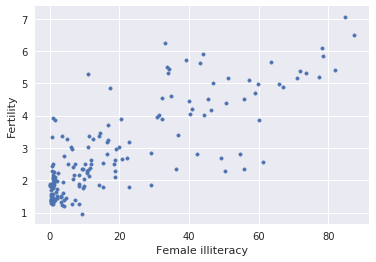

In [4]:
# Exploratory analysis of female literacy and fertility
plt.scatter(dataset['female illiteracy'], dataset['fertility'], marker='.')
plt.xlabel('Female illiteracy')
plt.ylabel('Fertility')
plt.show()

Observamos que *puede* existir una correlación entre el analfabetismo de la mujer y la fertilidad, pero dicha correlación puede deberse simplemente al azar. **La fertilidad dada en un país puede ser totalmente independiente del analfabetismo**. Para comprobar esto recurrimos a realizar un test sobre esta hipótesis. Para hacer esto, realizaremos permutaciones sobre los valores de analfabetismo dejando los valores de fertilidad como fijos. Esto simula la hipótesis de que son totalmente independientes dichas variables. Por cada permutación, calcularemos el **coeficiente de Pearson** y evaluaremos cuantas de las réplicas permutadas tienen un **coeficiente de Pearson** mayor que uno.

In [26]:
# Separamos los valores de interés del resto del DataFrame
fertility = dataset['fertility'].values
illiteracy = dataset['female illiteracy'].values

# Calculamos el coeficiente de pearson
r_obs = np.corrcoef(illiteracy, fertility)[0,1]

# Realizamos permutaciones sobre el valor de analfabetismo
perm = draw_perm_reps1d(illiteracy, fertility, size=10000)

# Calculamos el valor p
p = np.sum(perm >= r_obs) / len(perm)

# Imprimimos el valor de p
print("p-vale: ", p)

p-vale:  0.0


Hemos obtenido un valor de p igual a cero. En estadística, esto significa que nuestro valor de p es muy bajo, ya que nunca obtuvo una sola réplica en las 10,000 que realizó, que tuviera un coeficiente de pearson mayor que el observado.